In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv("gld_price_data.csv")

In [4]:
# print first 5 rows in the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
data.shape

(2290, 6)

In [38]:
# checking the number of missing values
# eksik değerlerin sayısının kontrol edilmesi
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [37]:
# getting the statistical measures of the data
# verilerin istatistiksel ölçülerini alma
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1-Positive Correlation
2-Negative Correlation

In [11]:
correlation = data.corr()

<AxesSubplot:>

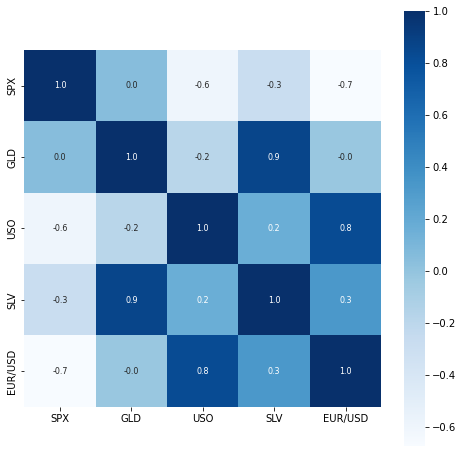

In [36]:
# constructing a heatmap to understand the correlatiom
# korelasyonu anlamak için bir ısı haritası oluşturma
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
# correlation values of GLD
# GLD'nin korelasyon değerleri
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

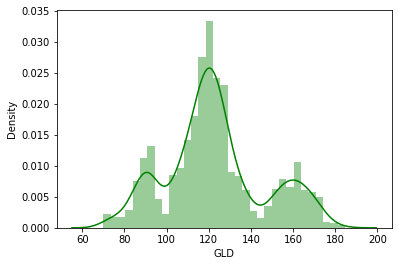

In [35]:
# checking the distribution of the GLD Price
# GLD Fiyatının dağılımının kontrol edilmesi
sns.distplot(data['GLD'],color='green')

Splitting the Features and Target

Özellikleri ve Hedefi Bölme

In [20]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

Eğitim Verileri ve Test Verilerine Bölme

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

Model Eğitimi: Rastgele Orman Regresyonu

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
# training the model
# modeli eğit
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [32]:
# prediction on Test Data
# data tahmin et 
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.60299915  82.24709984 115.78430046 127.7607007  120.8510013
 154.69869808 150.45679924 126.02850042 117.48639878 126.00420071
 116.9110008  172.47950088 141.49969827 168.08549862 115.15990014
 117.82760052 138.72950302 170.34180077 158.64640277 160.28569953
 155.23040063 125.02189995 175.89209973 156.6772037  125.19520032
  93.83379976  76.96300034 120.67079978 119.09879937 167.42450028
  88.02780014 124.9489001   91.22990072 117.66250005 121.15259893
 136.33780048 115.59090116 114.72430052 149.76340011 106.971101
 104.70910237  87.28119803 126.41020062 118.02709945 153.53399902
 119.90420001 108.24570018 108.41049877  93.13490058 127.1807976
  74.64580047 113.57219949 121.27050016 111.28329899 118.90639891
 120.3010994  158.71360098 167.49840102 146.9599971   85.77949868
  94.30630041  86.75919863  90.43690037 119.09380093 126.48640047
 127.47040014 169.63929999 122.21359967 117.35139897  98.61490036
 168.69250158 143.25629842 131.94610214 121.10020231 121.48329943
 119.77000043 

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894104980229563


Compare the Actual Values and Predicted Values in a Plot

Bir Grafikte Gerçek Değerleri ve Tahmini Değerleri Karşılaştırın

In [29]:
Y_test = list(Y_test)

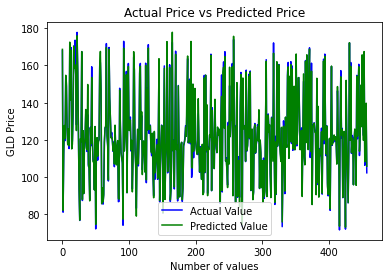

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()